In [1]:
import tensorflow as tf
import pathlib

data_dir = pathlib.Path('C:/Users/Hp/Contacts/Desktop/flower/Flower dataset')



In [2]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,          # Load images in batches
    shuffle=True            # Shuffle data
)

# Class names (subfolder names)
class_names = train_dataset.class_names
print("Class Names:", class_names)


Found 4317 files belonging to 5 classes.
Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [3]:
batch_size = 32
img_size = (224, 224)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names (subfolder names)
class_names = train_dataset.class_names
print("Class Names:", class_names)

# Normalize pixel values to [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


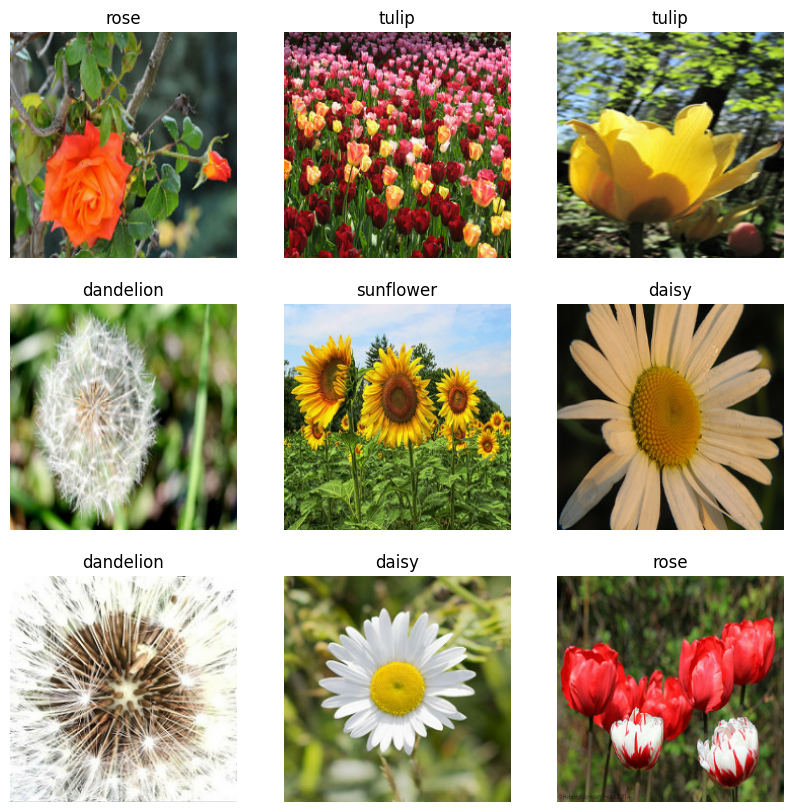

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Prevents overfitting
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,661 (169.37 MB)

 Trainable params: 44,398,661 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 7
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/7
108/108 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.3336 - loss: 1.6861 - val_accuracy: 0.5168 - val_loss: 1.1235
Epoch 2/7
107/108 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5643 - loss: 1.0801

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc*100:.2f}%")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_flower(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis("off")
    plt.show()

    return predicted_class

# Example usage
predict_flower('C:/Users/Hp/Contacts/Desktop/flower/Flower dataset/tulip/11746080_963537acdc.jpg')


In [ ]:

model.save("flower_classifier.h5")

In [ ]:
predict_flower('C:/Users/Hp/Contacts/Desktop/flower/Flower dataset/rose/12240303_80d87f77a3_n.jpg')